<a href="https://colab.research.google.com/github/Xavier-ML/Computational-Physics-with-Python/blob/main/06_Differential_equations_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving differential equations

- by Börge Göbel

## 1. Euler method

## 1.1 First order differential equation

We try to solve the following type of differential equation

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y)\\)

Since \\( \frac{\mathrm{d}y}{\mathrm{d}t} = \frac{y(t+h)-y(t)}{h}\\), we know that \\( y(t+h) = \frac{\mathrm{d}y}{\mathrm{d}t}h + y(t)\\).

Therefore, we can repetitively iterate the propagation: 

From the value \\( y_n \\) at step \\( n \\), corresponding to the time \\( t \\), we can calculate the value \\( y_{n+1} \\) at step \\( (n+1) \\), corresponding to the time \\( (t+h) \\):

\\( y_{n+1} = y_n + \frac{\mathrm{d}y}{\mathrm{d}t}h \\) which is 

\\( y_{n+1} = y_n + f(t,y_n) h \\)

### Example 1) Radioactive decay

\\( \dot{y} = -y\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -y\\)

Analytical solution: \\( y(t)=y_0 \exp(-t)\\)

In [27]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 

In [28]:
#Starting value
y = 1

# Number of iterations
nmax = 20

# stepsize
h = 0.1

# collect data
t_values = [0]
y_values = [y]

In [29]:
for i in range(1,nmax+1):
    f = -y
    y = y + f*h
    t_values.append(i*h)
    y_values.append(y)

In [30]:
t_values

[0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2000000000000002,
 1.3,
 1.4000000000000001,
 1.5,
 1.6,
 1.7000000000000002,
 1.8,
 1.9000000000000001,
 2.0]

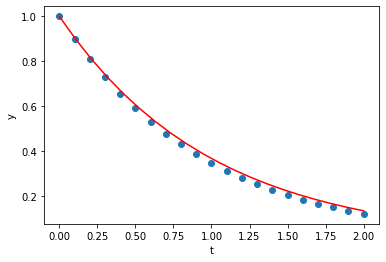

In [31]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = 1*np.exp(-test_t)
plt.plot(test_t, test_y, "red")

plt.xlabel("t")
plt.ylabel("y")
plt.scatter(t_values, y_values)

In [32]:
y

0.12157665459056928

In [33]:
np.exp(-nmax*h)

0.1353352832366127

### Define a function "eulerODE"

In [76]:
def eulerODE(f,t0,y0,nmax,h):
    # f: Function
    # t0: Stanting time
    # y0: Stanting value of y
    # nmax: Number of iteration
    # h: stepsize
    y = y0
    t = t0
    t_values = [0]
    y_values = [y]
    for i in range(1,nmax+1):
        y = y + f(t,y)*h
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values])

In [77]:
#Define function
def f_ODE(t,y):
    return -y

#Call Euler method
t0 = 0
y0 = 1
nmax = 200
h = 0.01
solution = eulerODE(f_ODE,t0,y0,nmax,h)

In [78]:
solution

array([[0.        , 0.01      , 0.02      , 0.03      , 0.04      ,
        0.05      , 0.06      , 0.07      , 0.08      , 0.09      ,
        0.1       , 0.11      , 0.12      , 0.13      , 0.14      ,
        0.15      , 0.16      , 0.17      , 0.18      , 0.19      ,
        0.2       , 0.21      , 0.22      , 0.23      , 0.24      ,
        0.25      , 0.26      , 0.27      , 0.28      , 0.29      ,
        0.3       , 0.31      , 0.32      , 0.33      , 0.34      ,
        0.35      , 0.36      , 0.37      , 0.38      , 0.39      ,
        0.4       , 0.41      , 0.42      , 0.43      , 0.44      ,
        0.45      , 0.46      , 0.47      , 0.48      , 0.49      ,
        0.5       , 0.51      , 0.52      , 0.53      , 0.54      ,
        0.55      , 0.56      , 0.57      , 0.58      , 0.59      ,
        0.6       , 0.61      , 0.62      , 0.63      , 0.64      ,
        0.65      , 0.66      , 0.67      , 0.68      , 0.69      ,
        0.7       , 0.71      , 0.72      , 0.73

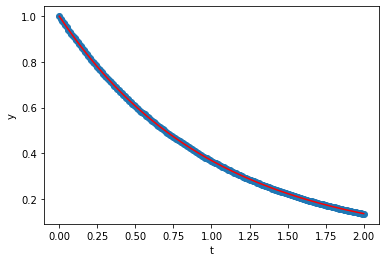

In [79]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = 1*np.exp(-test_t)
plt.plot(test_t, test_y, "red")

plt.xlabel("t")
plt.ylabel("y")
plt.scatter(solution[0], solution[1])

### Example 2) Time-amplified decay

\\( \dot{y} = -ayt\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -ayt\\)

Analytical solution: \\( y(t)=y_0 \exp(-t^2a/2)\\)

In [80]:
a = 0.01

#Define function
def f_ODE1(t,y):
    return -a*y*t

#Call Euler method
t0 = 0
y0 = 1
nmax = 300
h = 0.1
solution2 = eulerODE(f_ODE1,t0,y0,nmax,h)

In [81]:

solution2

array([[0.00000000e+00, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00, 1.10000000e+00,
        1.20000000e+00, 1.30000000e+00, 1.40000000e+00, 1.50000000e+00,
        1.60000000e+00, 1.70000000e+00, 1.80000000e+00, 1.90000000e+00,
        2.00000000e+00, 2.10000000e+00, 2.20000000e+00, 2.30000000e+00,
        2.40000000e+00, 2.50000000e+00, 2.60000000e+00, 2.70000000e+00,
        2.80000000e+00, 2.90000000e+00, 3.00000000e+00, 3.10000000e+00,
        3.20000000e+00, 3.30000000e+00, 3.40000000e+00, 3.50000000e+00,
        3.60000000e+00, 3.70000000e+00, 3.80000000e+00, 3.90000000e+00,
        4.00000000e+00, 4.10000000e+00, 4.20000000e+00, 4.30000000e+00,
        4.40000000e+00, 4.50000000e+00, 4.60000000e+00, 4.70000000e+00,
        4.80000000e+00, 4.90000000e+00, 5.00000000e+00, 5.10000000e+00,
        5.20000000e+00, 5.30000000e+00, 5.40000000e+00, 5.500000

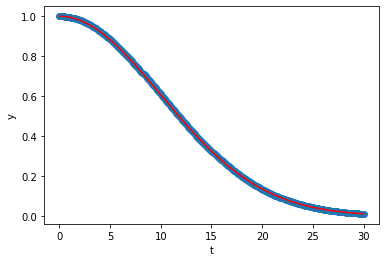

In [82]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2 *a/2)
plt.plot(test_t, test_y, "red")

plt.xlabel("t")
plt.ylabel("y")
plt.scatter(solution2[0], solution2[1])

### 1.2 Higher-order differential equations

Example: Second-order differential equation: \\( y''(t) = f\left(t,y(t),y'(t)\right)\\)

Introduce: \\( z_0(t) = y(t)\\) and \\( z_1(t) = y'(t)\\)

\\( \begin{pmatrix}z_0'(t)\\z_1'(t)\end{pmatrix}=\begin{pmatrix}z_1(t)\\f\left(t,z_0(t),z_1(t)\right)\end{pmatrix}\\)

Therefore, we can describe the second-order differential equation by a set of two first-order differential equations. We can solve both with our Euler method

\\( z_0^{(n+1)} = z_0^{(n)} + z_1^{(n)} h \\)

\\( z_1^{(n+1)} = z_1^{(n)} + f\left(t,z_0^{(n)},z_1^{(n)}\right) h \\)

Or, going back to our initial nomenclature:

\\( y_{n+1} = y_{n} + y'_{n} h \\)

\\( y'_{n+1} = y'_{n} + f\left(t,y_{n},y'_{n}\right) h \\)

### Example 3) Free fall

\\( \ddot{y} = -g\\) or

\\( \frac{\mathrm{d}^2y}{\mathrm{d}t^2} = f(t,y,\dot{y}) = -g\\)

Analytical solution: \\( y(t)=-\frac{g}{2}t^2+v_0t+y_0\\)

### Example 4) Harmonic oscillator

\\( \theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0 \\)

Here, \\( b \\) is the damping parameter and \\( c \\) is determined by the pendulum length \\( c = \frac{g}{l} \\).

### Small-angle approximation

For small angles \\( \theta\ll 1 \\) and without damping b = 0, we have 

\\( \theta''(t) = - \frac{g}{l}\theta(t) \\) with the solution (for \\( \theta'(0) = 0 \\))

\\( \theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right) \\) and a period of \\( T = 2\pi\sqrt{\frac{l}{g}} \\)

### Actual equation

- Small starting angle

- Large starting angle

- With damping

- Driven oscillator

# 2. Improved methods

The exist two useful solvers:
- Old: scipy.integrate.oldeint
- New: scipy.integrate.solve_ivp

### Example 2) Time-amplified decay

\\( \dot{y} = -ayt\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -ayt\\)

Analytical solution: \\( y(t)=y_0 \exp(-t^2a/2)\\)

- Our old results (Euler method)

- New results (solve_ivp)

### Example 3) Free fall

### Example 4) Driven pendulum

- Our old results (Euler method)

- New results (solve_ivp)

### Compare more methods

In [ ]:
# [https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp]
# methods:
# RK45
# RK23
# DOP853
# Radau
# BDF
# LSODA

## 3. Theory of the Runge-Kutta methods

There exist several different Runge-Kutta methods

Derivation is difficult: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Derivation_of_the_Runge%E2%80%93Kutta_fourth-order_method

### 3.1 Implementation of RK4

In [ ]:
# [https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Classic_fourth-order_method]



### 3.2 Implementation of RK45

In [ ]:
# [https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Fehlberg]



### 3.3 Comparison with Euler method